# Task 1
**We will do RFM analysis:**
- Recency: How recently has the customer made a transaction with us
- Frequency: How frequent is the customer in ordering/buying some product from us
- Monetary: How much does the customer spend on purchasing products from us.

# Importing important libraries 

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#loading database
df = pd.read_csv("C:\\Users\\TAMANNA\\Downloads\\customer_invoices_data.csv", encoding=
                 'latin1')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,12/9/2010 20:01,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,12/9/2010 20:01,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,12/9/2010 20:01,3.75,17530.0,United Kingdom


# Calculating Recency

In [5]:
#changing date to datetime format so that we can calculate days between last purchase date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [53]:
# group by through customer id and take max value 
df_recency = df.groupby(by='Customer ID',as_index=False)['InvoiceDate'].max()  
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.max()

CustomerID                      18287.0
LastPurchaseDate    2010-12-09 20:01:00
Recency                             373
dtype: object

# calculating frequency

In [27]:
frequency_df = df.drop_duplicates().groupby(
    by=['Customer ID'], as_index=False)['InvoiceDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,45
1,12347.0,71
2,12348.0,20
3,12349.0,107
4,12351.0,21


# Calculating Monetary Value

In [8]:
df['Total'] = df['Price']*df['Quantity']
monetary_df = df.groupby(by='Customer ID', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,-64.68
1,12347.0,1323.32
2,12348.0,222.16
3,12349.0,2646.99
4,12351.0,300.93


# Task 2

identifying Most Recent, Above Average, Below Average, Least Recent and lost customers according to recency

In [59]:
df_recency['Customer_Recency'] = np.where(df_recency['Recency'] < 30,"Most Recent",
                                (np.where(df_recency['Recency'] < 45,"Above Average",
                                (np.where(df_recency['Recency'] < 60,"Below Average",
                                 np.where(df_recency['Recency'] <= 75 ,"Least Recent","lost customers"))))))
df_recency[['CustomerID','Recency','Customer_Recency']]

,CustomerID,Recency,Customer_Recency
0,12346.0,66,Least Recent
1,12347.0,2,Most Recent
2,12348.0,73,Least Recent
3,12349.0,42,Above Average
4,12351.0,10,Most Recent
...,...,...,...
4378,18283.0,17,Most Recent
4379,18284.0,64,Least Recent
4380,18285.0,295,lost customers
4381,18286.0,111,lost customers


identifying Most Frequent, Above Average, Below Average, Least Frequent and lost customers according to frequency

In [69]:
frequency_df["Customer_Frequency"] = np.where(frequency_df['Frequency'] > 2000, "Most Frequent",
                                    (np.where(frequency_df['Frequency'] > 1500, "Above Average",
                                    (np.where(frequency_df['Frequency'] > 800, "Below Average",
                                    np.where(frequency_df['Frequency']  <= 800, "Least Frequent",'lost customers'))))))
frequency_df[['CustomerID', 'Frequency', 'Customer_Frequency']]

,CustomerID,Frequency,Customer_Frequency
0,12346.0,45,Least Frequent
1,12347.0,71,Least Frequent
2,12348.0,20,Least Frequent
3,12349.0,107,Least Frequent
4,12351.0,21,Least Frequent
...,...,...,...
4378,18283.0,217,Least Frequent
4379,18284.0,29,Least Frequent
4380,18285.0,12,Least Frequent
4381,18286.0,70,Least Frequent


identifying Most Monetary, Above Average, Below Average, Least Monetary and lost customers according to monetary

In [70]:
monetary_df["Customer_Monetary"] = np.where(monetary_df['Monetary'] >300000 , "Most Monetary",
                                (np.where(monetary_df['Monetary'] >= 300000, "Above Average",
                                (np.where(monetary_df['Monetary'] > 100000,"Below Average",
                                 np.where(monetary_df['Monetary'] <= 100000,"Least Monetary",'lost customers'))))))
monetary_df[['CustomerID', 'Monetary', 'Customer_Monetary']].head(20)

,CustomerID,Monetary,Customer_Monetary
0,12346.0,-64.68,Least Monetary
1,12347.0,1323.32,Least Monetary
2,12348.0,222.16,Least Monetary
3,12349.0,2646.99,Least Monetary
4,12351.0,300.93,Least Monetary
5,12352.0,343.80,Least Monetary
6,12353.0,317.76,Least Monetary
7,12355.0,488.21,Least Monetary
8,12356.0,3562.25,Least Monetary
9,12357.0,12079.99,Least Monetary


# Task 3

# Merging all three datasets

In [71]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Customer_Recency,Frequency,Customer_Frequency,Monetary,Customer_Monetary
0,12346.0,66,Least Recent,45,Least Frequent,-64.68,Least Monetary
1,12347.0,2,Most Recent,71,Least Frequent,1323.32,Least Monetary
2,12348.0,73,Least Recent,20,Least Frequent,222.16,Least Monetary
3,12349.0,42,Above Average,107,Least Frequent,2646.99,Least Monetary
4,12351.0,10,Most Recent,21,Least Frequent,300.93,Least Monetary


In [72]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Customer_Recency,Frequency,Customer_Frequency,Monetary,Customer_Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,66,Least Recent,45,Least Frequent,-64.68,Least Monetary,41.457490,51.483003,51.483003
1,12347.0,2,Most Recent,71,Least Frequent,1323.32,Least Monetary,95.465587,64.613279,64.613279
2,12348.0,73,Least Recent,20,Least Frequent,222.16,Least Monetary,38.207056,28.062971,28.062971
3,12349.0,42,Above Average,107,Least Frequent,2646.99,Least Monetary,56.009254,76.340406,76.340406
4,12351.0,10,Most Recent,21,Least Frequent,300.93,Least Monetary,84.326200,29.363450,29.363450


In [73]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,2.50
1,12347.0,3.46
2,12348.0,1.48
3,12349.0,3.66
4,12351.0,1.88
5,12352.0,1.70
6,12353.0,1.61


# Ranking Customer’s based upon their recency, frequency, and monetary score

In [74]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >4.5, "Best Customers",
                            (np.where(rfm_df['RFM_Score'] > 4,"High Spending",
                            (np.where(rfm_df['RFM_Score'] > 2,"Lowest Spending",'Churned best customers')))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.0,2.50,Lowest Spending
1,12347.0,3.46,Lowest Spending
2,12348.0,1.48,Churned best customers
3,12349.0,3.66,Lowest Spending
4,12351.0,1.88,Churned best customers
5,12352.0,1.70,Churned best customers
6,12353.0,1.61,Churned best customers
7,12355.0,1.42,Churned best customers
8,12356.0,3.54,Lowest Spending
9,12357.0,4.16,High Spending


In [75]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Customer_Recency,Frequency,Customer_Frequency,Monetary,Customer_Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346.0,66,Least Recent,45,Least Frequent,-64.68,Least Monetary,41.457490,51.483003,51.483003,2.50,Lowest Spending
1,12347.0,2,Most Recent,71,Least Frequent,1323.32,Least Monetary,95.465587,64.613279,64.613279,3.46,Lowest Spending
2,12348.0,73,Least Recent,20,Least Frequent,222.16,Least Monetary,38.207056,28.062971,28.062971,1.48,Churned best customers
3,12349.0,42,Above Average,107,Least Frequent,2646.99,Least Monetary,56.009254,76.340406,76.340406,3.66,Lowest Spending
4,12351.0,10,Most Recent,21,Least Frequent,300.93,Least Monetary,84.326200,29.363450,29.363450,1.88,Churned best customers


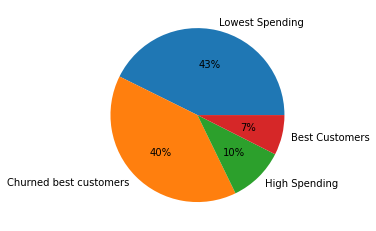

In [76]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [77]:
rfm_df.head(20)

,CustomerID,Recency,Customer_Recency,Frequency,Customer_Frequency,Monetary,Customer_Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,12346.0,66,Least Recent,45,Least Frequent,-64.68,Least Monetary,41.457490,51.483003,51.483003,2.50,Lowest Spending
1,12347.0,2,Most Recent,71,Least Frequent,1323.32,Least Monetary,95.465587,64.613279,64.613279,3.46,Lowest Spending
2,12348.0,73,Least Recent,20,Least Frequent,222.16,Least Monetary,38.207056,28.062971,28.062971,1.48,Churned best customers
3,12349.0,42,Above Average,107,Least Frequent,2646.99,Least Monetary,56.009254,76.340406,76.340406,3.66,Lowest Spending
4,12351.0,10,Most Recent,21,Least Frequent,300.93,Least Monetary,84.326200,29.363450,29.363450,1.88,Churned best customers
5,12352.0,10,Most Recent,18,Least Frequent,343.80,Least Monetary,84.326200,25.233858,25.233858,1.70,Churned best customers
6,12353.0,43,Above Average,20,Least Frequent,317.76,Least Monetary,55.488722,28.062971,28.062971,1.61,Churned best customers
7,12355.0,202,lost customers,22,Least Frequent,488.21,Least Monetary,16.842105,30.504221,30.504221,1.42,Churned best customers
8,12356.0,15,Most Recent,83,Least Frequent,3562.25,Least Monetary,78.415269,69.370294,69.370294,3.54,Lowest Spending
9,12357.0,23,Most Recent,165,Least Frequent,12079.99,Least Monetary,69.612493,85.580653,85.580653,4.16,High Spending
